In [30]:
import math
import random
import matplotlib.pyplot as plt

if __name__ =="__main__":

    """
    以X(0,0)为坐标原点点,往右和上方向分别衍生 m 距离 和 n 距离
    打击中心点应该为(m/2,n/2)
    """
    # 总长度为 2*n ，总宽度为 2*m
    #m = int(input("请输入需要的横向精度:"))
    #n = int(input("请输入需要的纵向精度:"))
    #Hit = int(input("请输入打击等级:"))
    #Res = int(input("请输入目标材质等级:"))
    m = 3
    n = 5
    Hit = 5
    Res =3

    theta = Hit/Res

    dm = 0.1
    dn = 0.1
    k = 1500

    #r_array = [[0 for i in range(m)] for j in range(n)]
    #R_distance2 = [[0 for i in range(m)] for j in range(n)]
    #p_array = [[0 for i in range(m)] for j in range(n)]
    #X_array = [[0 for i in range(m)] for j in range(n)]

    R_distance2 = [[0.0 for _ in range(n)] for _ in range(m)]
    p_array = [[0.0 for _ in range(n)] for _ in range(m)]
    X_array = [[0.0 for _ in range(n)] for _ in range(m)]



In [31]:
for i in range(m):
    for j in range(n):
        R_distance2[i][j] = (dm*(i-(m-1)/2))**2+ (dn*(j-(n-1)/2))**2
        p_array[i][j] = math.exp(-R_distance2[i][j]/k/theta)
        X_array[i][j] = 1-int(random.random()+1-p_array[i][j])

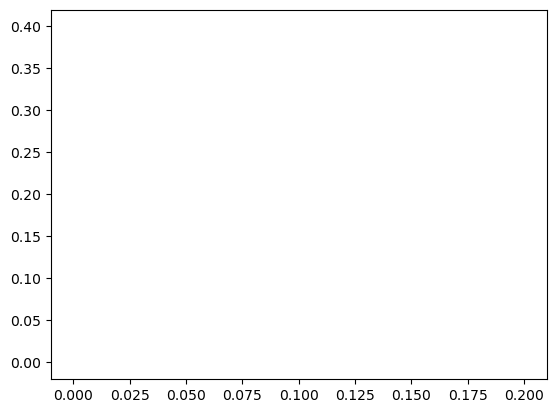

In [32]:

for i in range(m):
    for j in range(n):
        if X_array[i][j] == 1:
          plt.plot(i*dm,j*dn)

